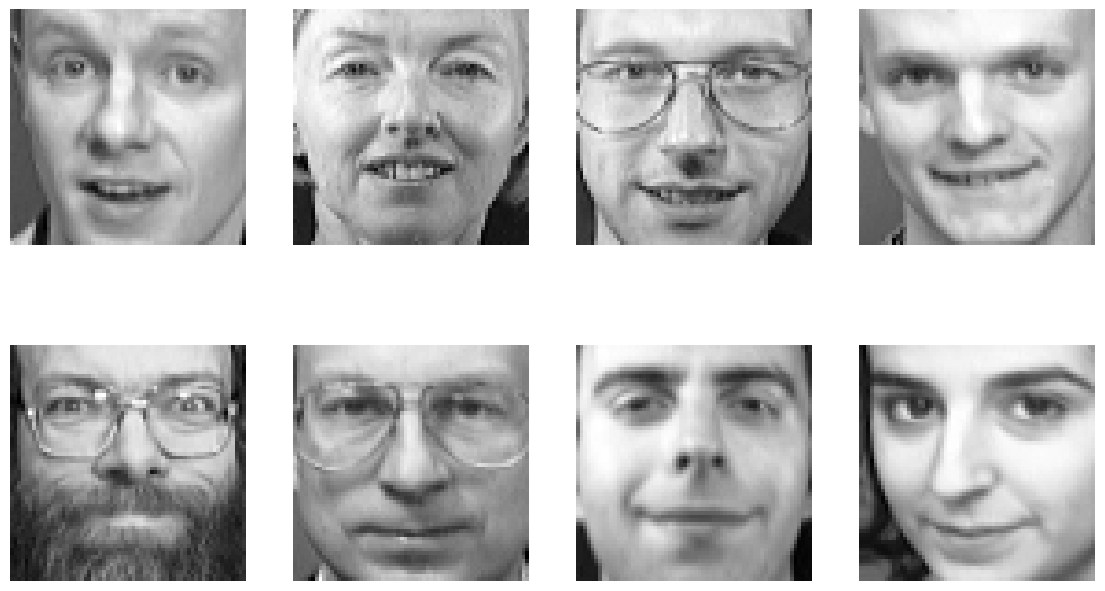

Sklearn Random Forest Accuracy with 50 trees: 0.90
Sklearn Random Forest Accuracy with 100 trees: 0.92


In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load the Olivetti face dataset
dataset = fetch_olivetti_faces()
X = dataset.data
y = dataset.target

# Display some example images from the dataset
np.random.seed(21)
idx_rand = np.random.randint(len(X), size=8)

plt.figure(figsize=(14, 8))
for p, i in enumerate(idx_rand):
    plt.subplot(2, 4, p + 1)
    plt.imshow(X[i, :].reshape((64, 64)), cmap='gray')
    plt.axis('off')
plt.show()

# Preprocess the dataset by centering the data around zero mean
n_samples, n_features = X.shape
X -= X.mean(axis=0)
X -= X.mean(axis=1).reshape(n_samples, -1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# Set up the random forest classifier using sklearn
# First, with 50 trees
rf_clf_50 = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=21)
rf_clf_50.fit(X_train, y_train)

# Predict on the test set and evaluate model accuracy
y_hat_50 = rf_clf_50.predict(X_test)
accuracy_50 = accuracy_score(y_test, y_hat_50)
print(f'Sklearn Random Forest Accuracy with 50 trees: {accuracy_50:.2f}')

# Now, increase the number of trees to 100 for improved performance
rf_clf_100 = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=21)
rf_clf_100.fit(X_train, y_train)

# Predict on the test set and evaluate model accuracy
y_hat_100 = rf_clf_100.predict(X_test)
accuracy_100 = accuracy_score(y_test, y_hat_100)
print(f'Sklearn Random Forest Accuracy with 100 trees: {accuracy_100:.2f}')


In [17]:
import joblib  # For saving and loading models

In [19]:

# Save the trained model to a file
model_filename = "random_forest_face_classifier.joblib"
joblib.dump(rf_clf_50, model_filename)
print(f"Model saved to {model_filename}")

# Load the model from the file
loaded_rf_clf = joblib.load(model_filename)
print("Model loaded successfully")

# Use the loaded model to make predictions
y_hat = loaded_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print(f'Loaded Model Accuracy with 100 trees: {accuracy:.2f}')


Model saved to random_forest_face_classifier.joblib
Model loaded successfully
Loaded Model Accuracy with 100 trees: 0.90
